# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [3]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [4]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [5]:
spaceship.shape

(8693, 14)

**Check for data types**

In [6]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [7]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [8]:
spaceship_clean = spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [9]:
spaceship_clean["Cabin"] = spaceship_clean["Cabin"].str[0]

/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_24885/3909548814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean["Cabin"] = spaceship_clean["Cabin"].str[0]


In [10]:
spaceship_clean.loc[:, "Cabin"] = spaceship_clean["Cabin"].str[0]

- Drop PassengerId and Name

In [11]:
spaceship_clean = spaceship_clean.drop(columns=["PassengerId", "Name"])

- For non-numerical columns, do dummies.

In [12]:
categorical_cols = spaceship_clean.select_dtypes(include="object").columns
categorical_cols

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [13]:
spaceship_clean = pd.get_dummies(
    spaceship_clean,
    columns=categorical_cols,
    drop_first=True
)


In [14]:
spaceship_clean

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,False,True,False,True,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,False,False,False,False,False,True,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False


**Perform Train Test Split**

In [15]:
X = spaceship_clean.drop(columns=["Transported"])
y = spaceship_clean["Transported"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape

(5284, 19)

In [18]:
X_test.shape

(1322, 19)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std_scaler = StandardScaler()

In [21]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled  = std_scaler.transform(X_test)

In [22]:
X_train_scaled.shape

(5284, 19)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def report_classification_results(model, X_test, y_test):
    """
    Plots confusion matrix and prints classification metrics
    """

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("📊 Classification Metrics")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print("\nDetailed Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure()
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

- Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


In [25]:
gb_clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

gb_clf.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


- Evaluate your model

📊 Classification Metrics
Accuracy : 0.788
Precision: 0.763
Recall   : 0.837
F1-score : 0.798

Detailed Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.74      0.78       661
        True       0.76      0.84      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



<Figure size 640x480 with 0 Axes>

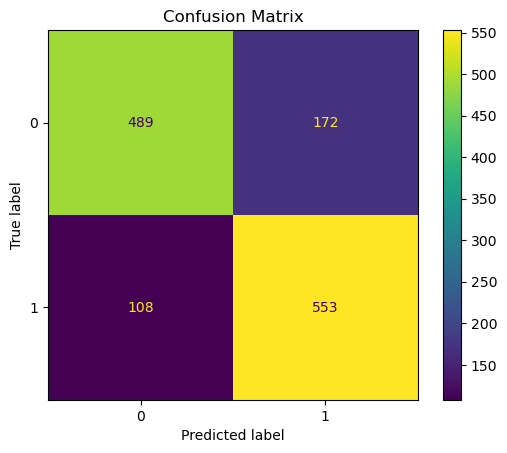

In [26]:
report_classification_results(gb_clf, X_test, y_test)


In [27]:

gb_importance = (
    pd.Series(gb_clf.feature_importances_, index=X_train.columns)
      .sort_values(ascending=False)
)

gb_importance.head(10)


CryoSleep_True       0.364322
Spa                  0.113884
VRDeck               0.113543
RoomService          0.106168
FoodCourt            0.086853
Cabin_G              0.056185
ShoppingMall         0.042684
Age                  0.039250
HomePlanet_Europa    0.025730
Cabin_E              0.023473
dtype: float64

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [33]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_estimators':[200,400],
    'learning_rate': [0.05,0.01],
    'max_depth': [3,5],
    'subsample' : [1.0,0.8]}

- Run Grid Search

In [34]:
import time

# We create an instance or our machine learning model
mdl = GradientBoostingClassifier(random_state=42)

# We need to set this two variables to be able to compute a confidence interval
confidence_level = 0.95
folds = 10

# Now we need to create an intance of the GridSearchCV class
#The option 'scoring', alonside with new_metric ='make_scorer' allows you to evaluate the model performance
gs = GridSearchCV(mdl, param_grid=parameter_grid, cv=folds, verbose=10) # Here the "cv" allows you to define the number of folds to use.

start_time = time.time()
gs.fit(X_train_scaled, y_train)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs.best_params_}")
print(f"The R2 is: {gs.best_score_: .4f}")


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0
[CV 1/10; 1/16] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0;, score=0.783 total time=   1.9s
[CV 2/10; 1/16] START learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0
[CV 2/10; 1/16] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0;, score=0.817 total time=   1.7s
[CV 3/10; 1/16] START learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0
[CV 3/10; 1/16] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0;, score=0.824 total time=   1.7s
[CV 4/10; 1/16] START learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0
[CV 4/10; 1/16] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0;, score=0.815 total time=   1.8s
[CV 5/10; 1/16] START learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0
[CV 5/10; 1/16] END learning_r

NameError: name 'st' is not defined

In [35]:
import scipy.stats as st

In [36]:

results_gs_df = pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

#print(results_df.head())
gs_mean_score = results_gs_df.iloc[0,-3]
gs_sem = results_gs_df.iloc[0,-2] / np.sqrt(10)

gs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound = gs_mean_score - ( gs_tc * gs_sem )
gs_upper_bound = gs_mean_score + ( gs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")

#display(results_df)

# Let's store the best model
best_model = gs.best_estimator_

The R2 confidence interval for the best combination of hyperparameters is:     ( 0.7940,  0.8071,  0.8203) 


- Evaluate your model

📊 Classification Metrics
Accuracy : 0.787
Precision: 0.768
Recall   : 0.825
F1-score : 0.795

Detailed Classification Report:

              precision    recall  f1-score   support

       False       0.81      0.75      0.78       661
        True       0.77      0.82      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



<Figure size 640x480 with 0 Axes>

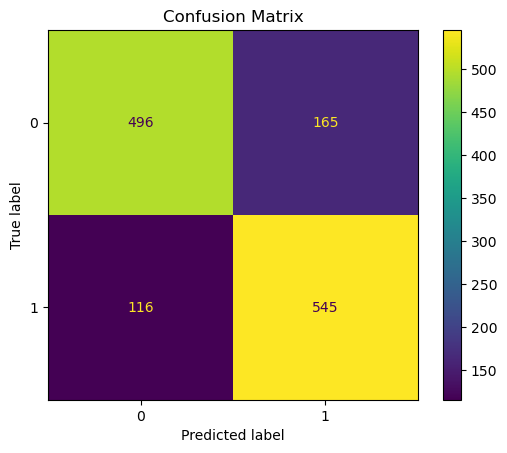

In [38]:
report_classification_results(best_model, X_test_scaled, y_test)